## Sklearn on the full dataset

In [20]:
import h5py
import numpy
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder

In [12]:
with h5py.File('data/chorales.hdf5', "r", libver='latest') as f:
    Xtrain = f['Xtrain'].value
    ytrain = f['ytrain'].value
    Xdev = f['Xdev'].value
    ydev = f['ydev'].value
    Xtest = f['Xtest'].value
    ytest = f['ytest'].value

Xtrain, Xdev, Xtest = Xtrain[:, range(10)], Xdev[:, range(10)], Xtest[:, range(10)]
Xtrain = numpy.vstack((Xtrain, Xdev))
Xall = numpy.vstack((Xtrain, Xtest))

with h5py.File('data/chorales_sm.hdf5', "r", libver='latest') as f:
    ytrain = f['ytrainfeat'].value
    ytest = f['ytestfeat'].value
    yall = f['yallfeat'].value

Xtrain.shape, Xall.shape

((18788, 10), (20773, 10))

In [13]:
Xtestex, ytestex = [], []
assert len(Xtest) == len(ytest)
for idx, x in enumerate(ytest):
    if x in ytrain:
        Xtestex.append(Xtest[idx])
        ytestex.append(ytest[idx])
Xtestex = numpy.matrix(Xtestex)
ytestex = numpy.array(ytestex)

In [16]:
logistic = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1000)
encoder = OneHotEncoder()
encoder.fit(Xall)
Xtrainsparse = encoder.transform(Xtrain)
Xtestsparse = encoder.transform(Xtest)
Xtestexsparse = encoder.transform(Xtestex)

In [48]:
logistic.fit(Xtrainsparse, ytrain)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0)

In [49]:
logistic.score(Xtrainsparse, ytrain)

0.59724292101341281

In [50]:
logistic.score(Xtestsparse, ytest)

0.2554156171284635

In [51]:
logistic.score(Xtestexsparse, ytestex)

0.27011188066062869

In [18]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(10, "entropy")
RF.fit(Xtrainsparse,ytrain)
print RF.score(Xtrainsparse, ytrain)
print RF.score(Xtestsparse, ytest)
print RF.score(Xtestexsparse, ytestex)

0.89360229934
0.291687657431
0.308470964305


In [91]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def plotNLLandConfidence(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    formatted = map(lambda x: x[:-2] if '\t\n' in x else x[:-1], lines)
    formatted = [map(float, x.split('\t')) for x in formatted]
    nll = [x[0] for x in formatted]
    per = [x[1] for x in formatted]
    fig, ax = plt.subplots(1, 2, figsize=(10,5))
    fig.tight_layout()
    ax[0].hist(per)
    ax[0].set_xlabel("Probability assigned to the correct decision")
    ax[1].hist(nll)
    ax[1].set_xlabel("NLL of the parameters given each outcome in the test set")
    plt.show()

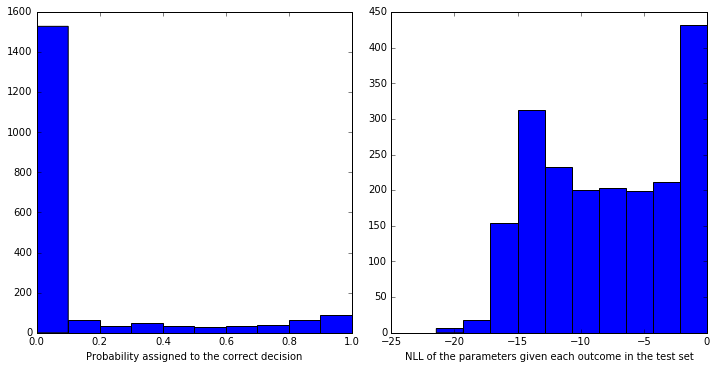

In [92]:
plotNLLandConfidence("smerror.txt")

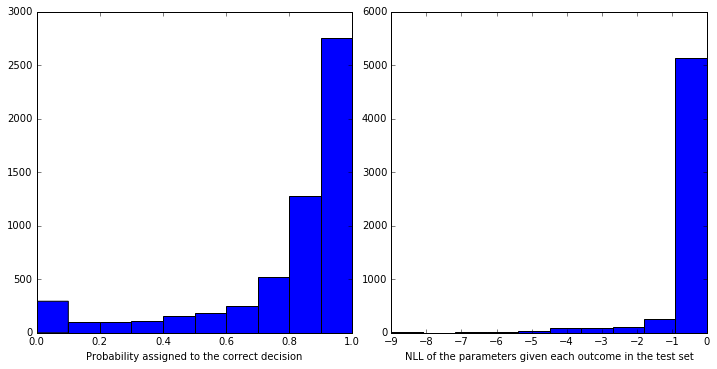

In [94]:
plotNLLandConfidence("smerror_train.txt")